In [1]:
##############################################################
#  WARNING, EXECUTE THIS LINE BEFORE EXEsCUTING ANY ROS CODE #
#                                                            #
#             source opt/ros/foxy/setup.bash                 #
#                                                            #
##############################################################

In [2]:
from __future__ import absolute_import, division, print_function# need to undestend their utility <-------- UNKNOWN
import tensorflow as tf
import keras# dont import keras ftom tensorflow library otherwise the code below will fail
from sklearn.model_selection import train_test_split
import numpy as np
from keras_visualizer import visualizer# used to visualize the neural network <-------------------- MORE INFORMATION
from tensorflow.keras.utils import plot_model# used to plot the neural network model <------------------MORE INFO
import matplotlib.pyplot as plt# this library will be used for data visualization

TestSize = 0.1# size of the test set

percent = 0.2# percentage of data we want to give to our system from all the data aveilable
# we start to take them from the start of the dataset , one after one)

LukyNumber = 4# the number that in this session will be associated to 1 while the others will be set to 0
# (we set all the other numbers to zero becouse otherwise the neural network behave incorrectly with thos libraries)

2022-06-29 01:16:57.371973: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-29 01:16:57.372017: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# import the dataset "mnist" that contains all the images of the numbers
# and relatives lables an then assine all those data to two sets ( training set and test set )

# adjusting the type of the data contained in the arrays in this way they can be also negative( maybe now it is usless)
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

# i have to scale the brightness of each pixel becouse otherwise i saturate the activation function (a wise man told me)
x_train = x_train/255
x_test = x_test/255

In [4]:
# I want to see some information about my data and they format
print(type(x_train))# return the typology of our data set of images
print(len(x_train))# retunr the lenth of the data set ( how much images we have )
print(np.shape(x_train))# return the shape of the data set, in our case we have the
# lenth and then the dimensions of the images

print(type(x_test))# return the typology of our training set of images
print(len(x_test))# retunr the lenth of the training set ( how much images we have )
print(np.shape(x_test))# return the shape of the training set, in our case we have the
# lenth and then the dimensions of the images

#print(dir(np))
#print(help(np.concatenate))

<class 'numpy.ndarray'>
60000
(60000, 28, 28)
<class 'numpy.ndarray'>
10000
(10000, 28, 28)


In [5]:
'''                             I HAVE TO CHECK IF THIS PART OF THE CODE IS CORRECT                            '''

#                                    Reduction of the dataset dimension

x_total_temp = np.append(x_train, x_test, axis=0)# CHECK IF THE PARTS ARE APPENDED CORRECTLY <------------- WARNING
print("Shape of x_total_temp: {0}".format(np.shape(x_total_temp)))

x_total = x_total_temp[0: int(np.shape(x_total_temp)[0]*percent)]
print("Shape of x_total reduced to {1}: {0}".format(np.shape(x_total), percent))

y_total_temp = np.append(y_train, y_test, axis=0)# CHECK IF THE PARTS ARE APPENDED CORRECTLY <------------- WARNING
print("Shape of y_total_temp: {0}".format(np.shape(y_total_temp)))

y_total = y_total_temp[0: int(np.shape(y_total_temp)[0]*percent)]
print("Shape of y_total reduced to {1}: {0}".format(np.shape(y_total), percent))

Shape of x_total_temp: (70000, 28, 28)
Shape of x_total reduced to 0.2: (14000, 28, 28)
Shape of y_total_temp: (70000,)
Shape of y_total reduced to 0.2: (14000,)


In [6]:
"""                                       THE ERROR COULD BE HERE                                                """
# Redistribution of the data in two sets ( test and train)
x_train, x_test, y_train, y_test = train_test_split(x_total, y_total, test_size=TestSize)

In [7]:
"""                                       THE ERROR COULD BE HERE                                                """
#                                     Assignment of values [1, -1]

# REWRITE THE CODE BECAUSE IT ISNT EFFISCENT ENOUGH (nested for loops or something else)

for i in range(0, np.shape(y_train)[0]):# <-------------------------------------------------- WARNING (use iterator)
    if y_train[i] == LukyNumber:
        y_train[i] = 1
    else:
        y_train[i] = -1
        
for i in range(0, np.shape(y_test)[0]):# <-------------------------------------------------- WARNING (use iterator)
    if y_test[i] == LukyNumber:
        y_test[i] = 1
    else:
        y_test[i] = -1
print(y_test.dtype)

int8


In [8]:
# TEST TO SEE THE SHAPE OF THE DATA
print("Lenth of y_train : {}\n".format(len(y_train)))
print("Shape of y_train : {}\n".format(np.shape(y_train)))
print("y_training : {}\n".format(y_train))

print("Lenth of y_test : {}\n".format(len(y_test)))
print("Shape of y_test : {}\n".format(np.shape(y_test)))
print("y_test : {}\n".format(y_test))

# I WANT TO SEE THE SHAPE OF PICTURES
print("Lenth of x_train : {}\n".format(len(x_train)))
print("Shape of x_train : {}\n".format(np.shape(x_train)))
print("x_train : {}\n".format(x_train))

print("Lenth of x_test : {}\n".format(len(x_test)))
print("Shape of x_test : {}\n".format(np.shape(x_test)))
print("x_test : {}\n".format(x_test))

Lenth of y_train : 12600

Shape of y_train : (12600,)

y_training : [-1 -1 -1 ... -1 -1 -1]

Lenth of y_test : 1400

Shape of y_test : (1400,)

y_test : [-1 -1 -1 ... -1 -1 -1]

Lenth of x_train : 12600

Shape of x_train : (12600, 28, 28)

x_train : [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0

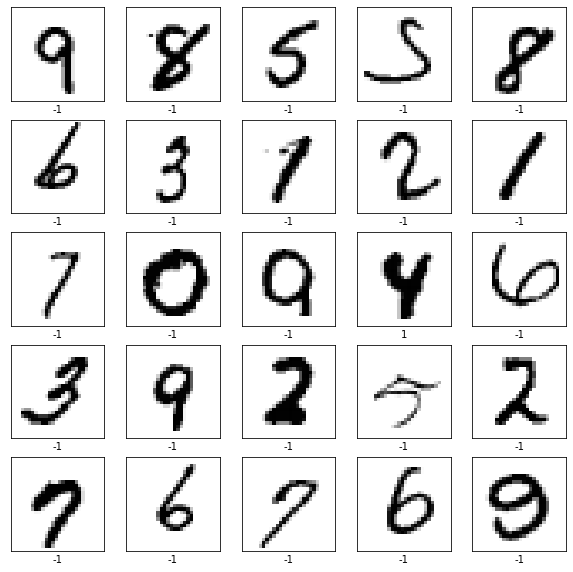

In [9]:
# display the first 25 training images with labels and verify that the data is in the correct formate.
plt.figure(figsize=(10,10))# <--------------------------------------------------------------------------- UNKNOWN
for i in range(25):# i want to plot 25 images
    plt.subplot(5,5,i+1)# the letter "i" rappresent the position 
    plt.xticks([])# <------------------------------------------------------------------------------------ UNKNOWN
    plt.yticks([])
    plt.grid(False)# in this way i will not have the grid in on the images
    plt.imshow(x_train[i], cmap=plt.cm.binary)# load the image and make it show black and white
    plt.xlabel(y_train[i])# add the lable associated to that image under it
plt.show()# show all the images

In [10]:
# HERE I RESHAPE THE IMAGES FROM A MATRIX TO A VECTOR MANTAINING THE DATA CONTENT
SrecchedDatasetX = np.reshape(x_train, (np.shape(x_train)[0], 784))# the dataset has 11200 elements, you have to make this part of code more general

# TEST TO SEE THE SHAPE OF THE DATA
print("Lenth of y_training : {}\n".format(len(y_train)))
print("Shape of y_training : {}\n".format(np.shape(y_train)))
print("y_training : {}\n".format(y_train))

# I WANT TO SEE THE SHAPE OF PICTURES
print("Lenth of x_training : {}\n".format(len(SrecchedDatasetX)))
print("Shape of x_training : {}\n".format(np.shape(SrecchedDatasetX)))
print("x_training : {}\n".format(SrecchedDatasetX))

Lenth of y_training : 12600

Shape of y_training : (12600,)

y_training : [-1 -1 -1 ... -1 -1 -1]

Lenth of x_training : 12600

Shape of x_training : (12600, 784)

x_training : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



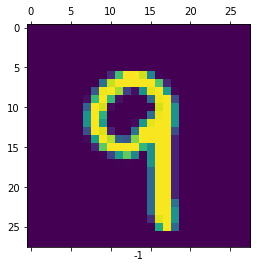

In [11]:
# HERE I TEST THE CONVERSION GOING BACKWARD (CHEKING IF THE IMAGE IS CORRECT)
#print(SrecchedDatasetX[1])
prova = np.reshape(SrecchedDatasetX[int(0)], (28, 28))# here at index you can put whatewer number you wish to see if the conversion went correctly
plt.matshow(prova)
plt.xlabel(y_train[0])
plt.show()

The erlier part was a preprocessing of the data, now we will use distributed gradient traking for the training of the neural network.
-

In [12]:
# example 
def adder(a: float, b: float) -> float:
    return float(a+b)
#type(adder(3, 5))

#NNShape = np.array([784, 10, 10, 10, 1])
#a = np.zeros(tuple(NNShape))
#print("\nshape of a: {0}".format(np.shape(a)))

In [13]:
'''
# labeling change for neural network
correct = np.zeros(784)
correct[0] = 1
wrong = np.zeros(784)
wrong[0] = -1

max_iters = 100# ricordati che questo e' da cambiare sotto
temp_label_point = np.zeros((np.shape(y_train)[0], 784))

for i in range(0, np.shape(y_train)[0]):
    if y_train[i] == 1:
        temp_label_point[i] = correct
        #print("im in 1")
    if y_train[i] == -1:
        temp_label_point[i] = wrong
        #print("im in -1")

print("\n\nDONE!!\n\n")
'''

'\n# labeling change for neural network\ncorrect = np.zeros(784)\ncorrect[0] = 1\nwrong = np.zeros(784)\nwrong[0] = -1\n\nmax_iters = 100# ricordati che questo e\' da cambiare sotto\ntemp_label_point = np.zeros((np.shape(y_train)[0], 784))\n\nfor i in range(0, np.shape(y_train)[0]):\n    if y_train[i] == 1:\n        temp_label_point[i] = correct\n        #print("im in 1")\n    if y_train[i] == -1:\n        temp_label_point[i] = wrong\n        #print("im in -1")\n\nprint("\n\nDONE!!\n\n")\n'

In [14]:
#print(correct)
#print(wrong)
#print(np.shape(y_train)[0])
#print(label_point[0])

ZeroVector = np.zeros(784+1)
#print(ZeroVector)

Riassegnamento [[ 1.22338651 -1.06290038 -1.27139921 ... -1.58171628  0.59934963
   0.19204473]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Cost at k=0 is 0.00000000
Cost at k=1 is 101.29213901
Cost at k=2 is 87.43882808
Cost at k=3 is 82.16784289
Cost at k=4 is 84.24629822
Cost at k=5 is 70.08688022
Cost at k=6 is 76.72995877
Cost at k=7 is 55.43393224
Cost at k=8 is 55.83594095
Cost at k=9 is 59.92437509
Cost at k=10 is 50.89485430
Cost at k=11 is 47.45472172
Cost at k=12 is 58.74870931
Cost at k=13 is 61.13498668
Cost at k=14 is 1358.57340984
Cost at k=15 is 69.28167125
Cost at k=16 is 39.47769813
Cost at k=17 is 43.26900780
Cost at k=18 is 23.25406511
Cost at k=19 is 64.53400966
Cost at k=20 is 32.68121014
Cost at k=21 is 49.42200501
Cost at k=22 is 39.42330991
Cost at k=23 is 37.05716179
Cost at k=24 is 35.03614821
Cost at k=25 is 20.66316551
Cost at k=26 is 46.54708192
Cost at k

Cost at k=280 is 4.14085823
Cost at k=281 is 12.03921801
Cost at k=282 is 20.74178741
Cost at k=283 is 551.02310013
Cost at k=284 is 3.67050176
Cost at k=285 is 34.31714709
Cost at k=286 is 17.20995056
Cost at k=287 is 88.76245216
Cost at k=288 is 20.58509449
Cost at k=289 is 13.52694691
Cost at k=290 is 13.93425298
Cost at k=291 is 22.76542309
Cost at k=292 is 33.82689075
Cost at k=293 is 713.32409765
Cost at k=294 is 3.92823719
Cost at k=295 is 2.63627340
Cost at k=296 is 21.70269459
Cost at k=297 is 23.68688279
Cost at k=298 is 7.73155662
Cost at k=299 is 3.75722489
Cost at k=300 is 1.08740441
Cost at k=301 is 17.61892489
Cost at k=302 is 1.45821403
Cost at k=303 is 11.60575586
Cost at k=304 is 15.13812777
Cost at k=305 is 0.96233935
Cost at k=306 is 11.39921434
Cost at k=307 is 2.04631492
Cost at k=308 is 26.72137626
Cost at k=309 is 93.99959203
Cost at k=310 is 17.14128419
Cost at k=311 is 0.97461429
Cost at k=312 is 1.81034553
Cost at k=313 is 12.28065489
Cost at k=314 is 261.936

Cost at k=568 is 11.60206086
Cost at k=569 is 0.07667885
Cost at k=570 is 1.07726588
Cost at k=571 is 0.24566106
Cost at k=572 is 0.02357384
Cost at k=573 is 24.30077937
Cost at k=574 is 3.54521029
Cost at k=575 is 7.41890873
Cost at k=576 is 0.59244549
Cost at k=577 is 0.95978102
Cost at k=578 is 0.06055588
Cost at k=579 is 5.95817995
Cost at k=580 is 1.93656171
Cost at k=581 is 4.94712967
Cost at k=582 is 0.97797118
Cost at k=583 is 0.14925104
Cost at k=584 is 11.79708678
Cost at k=585 is 0.20579105
Cost at k=586 is 0.03818186
Cost at k=587 is 0.20239425
Cost at k=588 is 6.61807471
Cost at k=589 is 6.54759866
Cost at k=590 is 4.23704326
Cost at k=591 is 4.13805339
Cost at k=592 is 0.29310285
Cost at k=593 is 4.87076292
Cost at k=594 is 0.03050903
Cost at k=595 is 4.12197032
Cost at k=596 is 3.96009425
Cost at k=597 is 0.05974700
Cost at k=598 is 1.76599705
Cost at k=599 is 3.57390975
Cost at k=600 is 2.24914036
Cost at k=601 is 4.60772135
Cost at k=602 is 0.04400923
Cost at k=603 is 

Cost at k=859 is 16.82640488
Cost at k=860 is 3.62923732
Cost at k=861 is 4.64936044
Cost at k=862 is 2.94777382
Cost at k=863 is 35.12776328
Cost at k=864 is 6.74671609
Cost at k=865 is 4.05078610
Cost at k=866 is 32.69447046
Cost at k=867 is 1.86943481
Cost at k=868 is 9.59364310
Cost at k=869 is 1.09139456
Cost at k=870 is 2.01556544
Cost at k=871 is 1.49914729
Cost at k=872 is 6.56425594
Cost at k=873 is 0.80422454
Cost at k=874 is 1.43788206
Cost at k=875 is 2.97107464
Cost at k=876 is 8.93401584
Cost at k=877 is 0.06920720
Cost at k=878 is 1.52780130
Cost at k=879 is 13.34344337
Cost at k=880 is 3.74440280
Cost at k=881 is 0.28171402
Cost at k=882 is 4.46890118
Cost at k=883 is 1.08634317
Cost at k=884 is 6.66081169
Cost at k=885 is 0.43884224
Cost at k=886 is 0.33822661
Cost at k=887 is 5.21087065
Cost at k=888 is 21.25799917
Cost at k=889 is 0.31265091
Cost at k=890 is 0.22147517
Cost at k=891 is 0.18634662
Cost at k=892 is 4.40284065
Cost at k=893 is 0.50701255
Cost at k=894 i

Cost at k=1145 is 0.36759781
Cost at k=1146 is 2.05366892
Cost at k=1147 is 1.97982201
Cost at k=1148 is 1.40942972
Cost at k=1149 is 0.11100009
Cost at k=1150 is 2.63003649
Cost at k=1151 is 3.82140401
Cost at k=1152 is 0.07492381
Cost at k=1153 is 0.85132957
Cost at k=1154 is 0.37128984
Cost at k=1155 is 19.18533632
Cost at k=1156 is 1.62064722
Cost at k=1157 is 11.09451372
Cost at k=1158 is 9.74302311
Cost at k=1159 is 2.16590878
Cost at k=1160 is 0.23811075
Cost at k=1161 is 7.17245925
Cost at k=1162 is 4.50411094
Cost at k=1163 is 0.04606295
Cost at k=1164 is 0.31415958
Cost at k=1165 is 2.76237490
Cost at k=1166 is 2.93623636
Cost at k=1167 is 0.10583155
Cost at k=1168 is 2.36877839
Cost at k=1169 is 0.85516157
Cost at k=1170 is 0.17686455
Cost at k=1171 is 0.07825759
Cost at k=1172 is 10.37751693
Cost at k=1173 is 0.10191351
Cost at k=1174 is 21.63015651
Cost at k=1175 is 0.78152373
Cost at k=1176 is 2.14614392
Cost at k=1177 is 5.88421797
Cost at k=1178 is 1.16446707
Cost at k=

Cost at k=1427 is 0.01797442
Cost at k=1428 is 0.68385205
Cost at k=1429 is 0.05824185
Cost at k=1430 is 1.44590004
Cost at k=1431 is 18.37182765
Cost at k=1432 is 3.78814136
Cost at k=1433 is 14.36116113
Cost at k=1434 is 0.21165322
Cost at k=1435 is 0.53197918
Cost at k=1436 is 2.98444033
Cost at k=1437 is 5.64752815
Cost at k=1438 is 0.08486998
Cost at k=1439 is 0.00152182
Cost at k=1440 is 4.39130259
Cost at k=1441 is 10.72964387
Cost at k=1442 is 0.00476430
Cost at k=1443 is 4.06958852
Cost at k=1444 is 0.23989409
Cost at k=1445 is 3.16822454
Cost at k=1446 is 12.04894669
Cost at k=1447 is 2.53801816
Cost at k=1448 is 2.66520487
Cost at k=1449 is 0.02256889
Cost at k=1450 is 5.70586798
Cost at k=1451 is 0.00914724
Cost at k=1452 is 7.07554068
Cost at k=1453 is 37.17159377
Cost at k=1454 is 3.76527694
Cost at k=1455 is 0.25972812
Cost at k=1456 is 5.89797480
Cost at k=1457 is 1.93516375
Cost at k=1458 is 0.06279290
Cost at k=1459 is 0.17865925
Cost at k=1460 is 0.07222825
Cost at k

Cost at k=1709 is 0.07683798
Cost at k=1710 is 0.03074565
Cost at k=1711 is 8.66561613
Cost at k=1712 is 0.05655052
Cost at k=1713 is 3.48894377
Cost at k=1714 is 5.00990001
Cost at k=1715 is 0.03382642
Cost at k=1716 is 0.64325051
Cost at k=1717 is 2.77694742
Cost at k=1718 is 1.25833043
Cost at k=1719 is 1.53530578
Cost at k=1720 is 16.75963859
Cost at k=1721 is 0.38962426
Cost at k=1722 is 3.96917440
Cost at k=1723 is 333.63679038
Cost at k=1724 is 4.75771487
Cost at k=1725 is 0.23265138
Cost at k=1726 is 0.02712034
Cost at k=1727 is 0.09467009
Cost at k=1728 is 1.77312877
Cost at k=1729 is 5.58671775
Cost at k=1730 is 11.55051152
Cost at k=1731 is 1.95065796
Cost at k=1732 is 4.17699766
Cost at k=1733 is 2.84690870
Cost at k=1734 is 2.59007834
Cost at k=1735 is 0.52522097
Cost at k=1736 is 0.01771032
Cost at k=1737 is 1.23871322
Cost at k=1738 is 1.02358676
Cost at k=1739 is 1.84908040
Cost at k=1740 is 0.55635587
Cost at k=1741 is 0.25001661
Cost at k=1742 is 0.16297072
Cost at k=

Cost at k=1991 is 0.01660046
Cost at k=1992 is 24.05079981
Cost at k=1993 is 0.35104940
Cost at k=1994 is 13.42581531
Cost at k=1995 is 4.11274246
Cost at k=1996 is 3.23898172
Cost at k=1997 is 0.03272998
Cost at k=1998 is 14.61964835
Cost at k=1999 is 0.01279208
Cost at k=2000 is 0.52291788
Cost at k=2001 is 2.19752851
Cost at k=2002 is 0.00897082
Cost at k=2003 is 0.06155358
Cost at k=2004 is 0.00043667
Cost at k=2005 is 0.04286486
Cost at k=2006 is 0.99047511
Cost at k=2007 is 0.01945183
Cost at k=2008 is 0.02623518
Cost at k=2009 is 0.03764648
Cost at k=2010 is 0.14003089
Cost at k=2011 is 4.19077664
Cost at k=2012 is 0.02542502
Cost at k=2013 is 0.17704006
Cost at k=2014 is 10.73779972
Cost at k=2015 is 0.25628284
Cost at k=2016 is 0.09493205
Cost at k=2017 is 2.29824410
Cost at k=2018 is 0.00496212
Cost at k=2019 is 2.25362337
Cost at k=2020 is 0.12865017
Cost at k=2021 is 2.00569773
Cost at k=2022 is 0.46000349
Cost at k=2023 is 0.86056866
Cost at k=2024 is 0.01603894
Cost at k=

Cost at k=2274 is 4.04388802
Cost at k=2275 is 0.09324241
Cost at k=2276 is 0.08298459
Cost at k=2277 is 3.37494481
Cost at k=2278 is 0.06149446
Cost at k=2279 is 0.83134417
Cost at k=2280 is 0.01277808
Cost at k=2281 is 2.81907756
Cost at k=2282 is 4.95931529
Cost at k=2283 is 4.56822785
Cost at k=2284 is 0.09136811
Cost at k=2285 is 10.25445779
Cost at k=2286 is 3.80063265
Cost at k=2287 is 5.32902611
Cost at k=2288 is 2.48303723
Cost at k=2289 is 0.08184791
Cost at k=2290 is 0.64303502
Cost at k=2291 is 1.35405597
Cost at k=2292 is 4.96073988
Cost at k=2293 is 8.38783718
Cost at k=2294 is 0.02060130
Cost at k=2295 is 0.00141839
Cost at k=2296 is 2.77055315
Cost at k=2297 is 3.27697681
Cost at k=2298 is 0.62888509
Cost at k=2299 is 0.02185893
Cost at k=2300 is 0.02144809
Cost at k=2301 is 0.78604692
Cost at k=2302 is 0.03974761
Cost at k=2303 is 0.22552788
Cost at k=2304 is 4.48529886
Cost at k=2305 is 0.01470777
Cost at k=2306 is 1.66158144
Cost at k=2307 is 0.10215339
Cost at k=230

Cost at k=2557 is 1.22627648
Cost at k=2558 is 0.01851157
Cost at k=2559 is 0.00417220
Cost at k=2560 is 0.11266043
Cost at k=2561 is 1.49508492
Cost at k=2562 is 2.44843797
Cost at k=2563 is 1.39724949
Cost at k=2564 is 0.28611955
Cost at k=2565 is 0.13749234
Cost at k=2566 is 4.04580562
Cost at k=2567 is 1.45607597
Cost at k=2568 is 1.05622162
Cost at k=2569 is 0.02293353
Cost at k=2570 is 0.06744634
Cost at k=2571 is 0.05663217
Cost at k=2572 is 0.00028367
Cost at k=2573 is 7.08198201
Cost at k=2574 is 3.93786007
Cost at k=2575 is 0.69278366
Cost at k=2576 is 0.02370848
Cost at k=2577 is 0.24449666
Cost at k=2578 is 0.00923347
Cost at k=2579 is 0.83469326
Cost at k=2580 is 0.38009824
Cost at k=2581 is 0.11981997
Cost at k=2582 is 0.05036414
Cost at k=2583 is 0.01653463
Cost at k=2584 is 0.79729750
Cost at k=2585 is 0.02353740
Cost at k=2586 is 0.00396314
Cost at k=2587 is 0.01161350
Cost at k=2588 is 1.85421464
Cost at k=2589 is 1.16877590
Cost at k=2590 is 0.48860757
Cost at k=2591

Cost at k=2840 is 0.35629018
Cost at k=2841 is 0.00324423
Cost at k=2842 is 0.06101545
Cost at k=2843 is 0.02673565
Cost at k=2844 is 0.01942036
Cost at k=2845 is 2.27321606
Cost at k=2846 is 2.96064335
Cost at k=2847 is 0.04511771
Cost at k=2848 is 0.01775048
Cost at k=2849 is 0.95945682
Cost at k=2850 is 0.25029015
Cost at k=2851 is 1.16701126
Cost at k=2852 is 0.46967579
Cost at k=2853 is 0.07621084
Cost at k=2854 is 0.20041121
Cost at k=2855 is 0.00982889
Cost at k=2856 is 0.01503370
Cost at k=2857 is 0.24641081
Cost at k=2858 is 4.81363552
Cost at k=2859 is 1.41507179
Cost at k=2860 is 0.29474318
Cost at k=2861 is 0.27198978
Cost at k=2862 is 0.87407944
Cost at k=2863 is 9.17520465
Cost at k=2864 is 0.46997294
Cost at k=2865 is 0.00614111
Cost at k=2866 is 5.28345987
Cost at k=2867 is 1.37833258
Cost at k=2868 is 1.36722434
Cost at k=2869 is 0.06516068
Cost at k=2870 is 0.97413146
Cost at k=2871 is 0.21570924
Cost at k=2872 is 1.70720347
Cost at k=2873 is 0.04557239
Cost at k=2874

Cost at k=3123 is 0.00200983
Cost at k=3124 is 1.77086419
Cost at k=3125 is 7.46713904
Cost at k=3126 is 0.10315339
Cost at k=3127 is 0.01167762
Cost at k=3128 is 0.44208289
Cost at k=3129 is 0.00006041
Cost at k=3130 is 0.10098931
Cost at k=3131 is 0.00660553
Cost at k=3132 is 7.36773610
Cost at k=3133 is 0.14775095
Cost at k=3134 is 0.13199658
Cost at k=3135 is 8.16933326
Cost at k=3136 is 0.02061636
Cost at k=3137 is 0.00121242
Cost at k=3138 is 0.00569788
Cost at k=3139 is 2.19113811
Cost at k=3140 is 0.31043119
Cost at k=3141 is 0.21469394
Cost at k=3142 is 4.33353606
Cost at k=3143 is 2.01380501
Cost at k=3144 is 11.48814516
Cost at k=3145 is 0.01098461
Cost at k=3146 is 0.32951318
Cost at k=3147 is 0.55129195
Cost at k=3148 is 0.94577837
Cost at k=3149 is 0.02044761
Cost at k=3150 is 0.92715994
Cost at k=3151 is 0.48189155
Cost at k=3152 is 0.00696936
Cost at k=3153 is 0.04186778
Cost at k=3154 is 0.11631306
Cost at k=3155 is 6.96495011
Cost at k=3156 is 4.50525242
Cost at k=315

Cost at k=3406 is 0.23675893
Cost at k=3407 is 0.93154433
Cost at k=3408 is 3.54377126
Cost at k=3409 is 0.05762029
Cost at k=3410 is 1.49057747
Cost at k=3411 is 0.55119290
Cost at k=3412 is 5.18982599
Cost at k=3413 is 0.59001676
Cost at k=3414 is 0.42807179
Cost at k=3415 is 0.00256252
Cost at k=3416 is 0.37297489
Cost at k=3417 is 0.03306004
Cost at k=3418 is 0.00225816
Cost at k=3419 is 0.66875013
Cost at k=3420 is 0.04630737
Cost at k=3421 is 0.01412245
Cost at k=3422 is 0.80242318
Cost at k=3423 is 0.43022513
Cost at k=3424 is 0.01121371
Cost at k=3425 is 2.08359322
Cost at k=3426 is 0.03457831
Cost at k=3427 is 0.00462739
Cost at k=3428 is 0.15184184
Cost at k=3429 is 0.02090178
Cost at k=3430 is 0.58556569
Cost at k=3431 is 11.58071119
Cost at k=3432 is 0.55403537
Cost at k=3433 is 6.49194765
Cost at k=3434 is 0.08298341
Cost at k=3435 is 0.21614263
Cost at k=3436 is 1.05255592
Cost at k=3437 is 0.73099939
Cost at k=3438 is 0.03709761
Cost at k=3439 is 0.00009976
Cost at k=344

Cost at k=3689 is 0.01292718
Cost at k=3690 is 0.01373106
Cost at k=3691 is 0.01071989
Cost at k=3692 is 4.03019564
Cost at k=3693 is 0.03504246
Cost at k=3694 is 0.02245176
Cost at k=3695 is 1.60972541
Cost at k=3696 is 0.85050577
Cost at k=3697 is 0.67616361
Cost at k=3698 is 7.13607493
Cost at k=3699 is 0.01739965
Cost at k=3700 is 0.85573180
Cost at k=3701 is 0.04611166
Cost at k=3702 is 0.50298697
Cost at k=3703 is 0.03978554
Cost at k=3704 is 0.03950933
Cost at k=3705 is 4.10363222
Cost at k=3706 is 5.20250520
Cost at k=3707 is 0.18189165
Cost at k=3708 is 4.20815795
Cost at k=3709 is 0.01711327
Cost at k=3710 is 0.00731157
Cost at k=3711 is 2.83156650
Cost at k=3712 is 0.00298762
Cost at k=3713 is 0.25404613
Cost at k=3714 is 1.63469331
Cost at k=3715 is 0.00747532
Cost at k=3716 is 0.13808694
Cost at k=3717 is 0.74797075
Cost at k=3718 is 0.50267016
Cost at k=3719 is 0.26276096
Cost at k=3720 is 4.03728216
Cost at k=3721 is 0.07108614
Cost at k=3722 is 2.04060273
Cost at k=3723

Cost at k=3972 is 6.53216129
Cost at k=3973 is 0.01576322
Cost at k=3974 is 5.28967962
Cost at k=3975 is 0.09928159
Cost at k=3976 is 0.10535623
Cost at k=3977 is 0.46189968
Cost at k=3978 is 0.05926898
Cost at k=3979 is 1.25670045
Cost at k=3980 is 1.81239767
Cost at k=3981 is 0.16166714
Cost at k=3982 is 1.40334448
Cost at k=3983 is 6.66487696
Cost at k=3984 is 0.05251473
Cost at k=3985 is 0.74394265
Cost at k=3986 is 0.00026981
Cost at k=3987 is 7.00957020
Cost at k=3988 is 0.37339894
Cost at k=3989 is 4.54003237
Cost at k=3990 is 0.00086657
Cost at k=3991 is 0.00502519
Cost at k=3992 is 14.31654601
Cost at k=3993 is 0.07788247
Cost at k=3994 is 8.66026791
Cost at k=3995 is 4.03295026
Cost at k=3996 is 0.56817107
Cost at k=3997 is 0.00716161
Cost at k=3998 is 8.74359562
Cost at k=3999 is 0.00314442


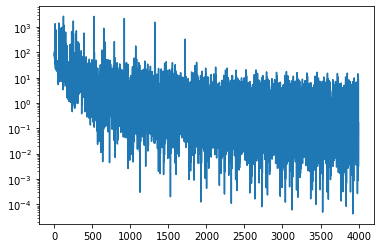

In [15]:

np.random.seed(0)

###############################################################################

T = 4 # Layers
d = 784  # Number of neurons in each layer. Same numbers for all the layers

# Training Set
#label_point = temp_label_point[0] # D = x0 # <-------------------------------------------------- Warning, change it
#label_point = label_point[0]

label_point = y_train
data_point = SrecchedDatasetX# vectorized image

# Gradient Method Parameters
max_iters = 4000 # epochs
stepsize = 0.0005 # learning rate

# questa cosa non va bene, serve solo per il debugghing
for i in range(0, max_iters):
    label_point[i] = label_point[i%400]
    data_point[i] = data_point[i%400]

###############################################################################
# Activation Function

DecisionVAriable = False
'''
def sigmoid_fn(xi):
    return 1/(1+np.exp(-xi))

# Derivative of Activation Function
def sigmoid_fn_derivative(xi):
    return sigmoid_fn(xi)*(1-sigmoid_fn(xi))
'''


def sigmoid_fn(xi):# tanh
    return (np.exp(xi) - np.exp(-xi)) / (np.exp(xi) + np.exp(-xi))

def sigmoid_fn_derivative(xi):# tanh_derivative
    return (2/(np.exp(xi)+np.exp(-xi)))**2


# Inference: x_tp = f(xt,ut)
def inference_dynamics(xt,ut):
    """
        input: 
              xt current state
              ut current input
        output: 
              xtp next state
    """
    xtp = np.zeros(d)
    for ell in range(d):
        temp = xt@ut[ell,1:] + ut[ell,0] # including the bias

        xtp[ell] = sigmoid_fn( temp ) # x' * u_ell
  
    return xtp

# Forward Propagation
def forward_pass(uu,x0):
    """
        input: 
              uu input trajectory: u[0],u[1],..., u[T-1]
              x0 initial condition
        output: 
              xx state trajectory: x[1],x[2],..., x[T]
    """
    xx = np.zeros((T,d))
    xx[0] = x0

    for t  in range(T-1):
        xx[t+1] = inference_dynamics(xx[t],uu[t]) # x^+ = f(x,u)

    return xx
  


# Adjoint dynamics: 
#   state:    lambda_t = A.T lambda_tp
#   output: deltau_t = B.T lambda_tp
def adjoint_dynamics(ltp,xt,ut):
    """
        input: 
              llambda_tp current costate
              xt current state
              ut current input
        output: 
              llambda_t next costate
              delta_ut loss gradient wrt u_t
    """
    df_dx = np.zeros((d,d))

    # df_du = np.zeros((d,(d+1)*d))
    Delta_ut = np.zeros((d,d+1))

    for j in range(d):
        dsigma_j = sigmoid_fn_derivative(xt@ut[j,1:] + ut[j,0]) 

        df_dx[:,j] = ut[j,1:]*dsigma_j
        # df_du[j, XX] = dsigma_j*np.hstack([1,xt])
    
        # B'@ltp
        Delta_ut[j,0] = ltp[j]*dsigma_j
        Delta_ut[j,1:] = xt*ltp[j]*dsigma_j
  
    lt = df_dx@ltp # A'@ltp
    # Delta_ut = df_du@ltp

    return lt, Delta_ut

# Backward Propagation
def backward_pass(xx,uu,llambdaT):
    """
        input: 
              xx state trajectory: x[1],x[2],..., x[T]
              uu input trajectory: u[0],u[1],..., u[T-1]
              llambdaT terminal condition
        output: 
              llambda costate trajectory
              delta_u costate output, i.e., the loss gradient
    """
    llambda = np.zeros((T,d))
    llambda[-1] = llambdaT

    Delta_u = np.zeros((T-1,d,d+1))

    for t in reversed(range(T-1)): # T-2,T-1,...,1,0
        llambda[t], Delta_u[t] = adjoint_dynamics(llambda[t+1],xx[t],uu[t])

    return Delta_u

  
###############################################################################
# MAIN
###############################################################################

J = np.zeros(max_iters)                       # Cost

# Initial Weights / Initial Input Trajectory
uu = -np.random.randn(T-1, d, d+1)# there is d+1 becouse we have bias in each node

# Initial State Trajectory
xx = forward_pass(uu,data_point[0]) # T x d


# forcing the last layer
for i in range(1, np.shape(uu)[1]):
    uu[np.shape(uu)[0]-1][i]=ZeroVector
print("Riassegnamento {0}".format(uu[np.shape(uu)[0]-1][0:3]))


# GO!
for k in range(max_iters):
    #if k%2 == 0:
    print('Cost at k={:d} is {:.8f}'.format(k,J[k-1]))
   
    # Initial State Trajectory
    xx = forward_pass(uu,data_point[k]) # T x d

    # Backward propagation
    llambdaT = 2*( xx[-1,:] - label_point[k]) # xT . LambdaT = 2*(-LablePoint)
    Delta_u = backward_pass(xx,uu,llambdaT) # the gradient of the loss function 
  
    # Update the weights
    uu = uu - stepsize*Delta_u # overwriting the old value


    '''
    for i in range(1, np.shape(uu)[1]):
        uu[np.shape(uu)[0]-1][i]=ZeroVector

    print("Riassegnamento {0}".format(uu[np.shape(uu)[0]-1][0:3]))
    print("xx {0}".format(xx[np.shape(xx)[0]-1][0:3]))
    '''


  
    # Forward propagation
    xx = forward_pass(uu,data_point[k])
  
    # Store the Loss Value across Iterations
    J[k] = (xx[-1,:] - label_point[k])@(xx[-1,:] - label_point[k]) # it is the cost at k+1
    # np.linalg.norm( xx[-1,:] - label_point )**2

_,ax = plt.subplots()
ax.plot(range(max_iters),J)
plt.yscale("log")
plt.show()


In [16]:
np.shape(ZeroVector)

(785,)

In [17]:
np.shape(xx)

(4, 784)

In [18]:
np.shape(uu)

(3, 784, 785)

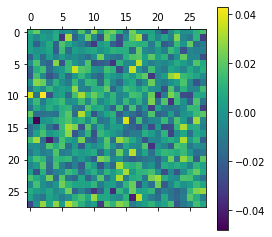

In [19]:
AAAA = uu[2][90][1:785]
prova = np.reshape(AAAA, (28, 28))# here at index you can put whatewer number you wish to see if the conversion went correctly
plt.matshow(prova)
plt.colorbar()
plt.grid(False)
plt.show()

In [20]:
9.99947256e-001

0.999947256

Shape of the solutions propagationa (4, 784)
label_point :-1
NN concensus: -0.9915480944110566


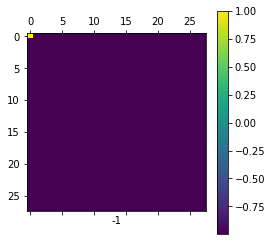

In [21]:
mm = 91
xx = forward_pass(uu,data_point[mm])
print("Shape of the solutions propagationa {0}".format(np.shape(xx)))
#print("Predicted solution {0}".format(xx[-1][:]))
print("label_point :{0}".format(label_point[mm]))
print("NN concensus: {0}".format(np.mean(xx[-1][:])))

prova = np.reshape(xx[3], (28, 28))# here at index you can put whatewer number you wish to see if the conversion went correctly
plt.matshow(prova)
plt.colorbar()# i want to have the gradueted bar with colors
plt.grid(False)# i dont want to have a grid on the image
plt.xlabel(label_point[mm])# write the number on the photo on x axis
plt.show()

In [22]:
np.mean(xx[-1][:])

-0.9915480944110566

In [23]:
uu = np.random.randn(T-1, d, d+1)

In [24]:
np.shape(uu)

(3, 784, 785)

[-0.9999999958776926, -0.9999999695400409, -0.999999774929676, -0.9999983369439447, -0.9999877116507956, -0.999909204262595, -0.9993292997390669, -0.9950547536867306, -0.964027580075817, -0.7615941559557649, 0.0, 0.7615941559557649, 0.964027580075817, 0.9950547536867306, 0.9993292997390669, 0.999909204262595, 0.9999877116507956, 0.9999983369439447, 0.999999774929676, 0.9999999695400409]


ValueError: x and y must have same first dimension, but have shapes (0,) and (20,)

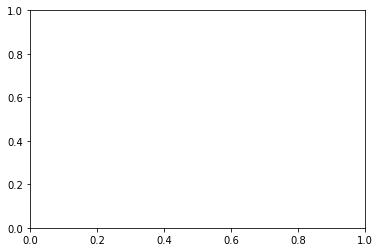

In [25]:

lista = []
lista2 = []
for i in range(-10, 10, 1):
    lista.append(sigmoid_fn(i))
    lista2.append(sigmoid_fn_derivative(i))
    iteratore = []
print(lista)


plt.plot(iteratore, lista2)
plt.show()

In [ ]:
def ReluPlus(xi):
    if xi>=0:
        return xi
    else:
        return 0.1*xi

def ReluPlus_derivative(xi):
    if xi>=0:
        return 1
    else:
        return 0.1
    
listaaaa = []
listaaaa2 = []
iteratore = []
for i in range(-10, 10, 1):
    listaaaa.append(ReluPlus(i))
    listaaaa2.append(ReluPlus_derivative(i))
    iteratore.append(i)
print(listaaaa)
print(listaaaa2)

plt.plot(iteratore, listaaaa2)
plt.show()

In [ ]:
#dir(tf.keras.layers)

In [ ]:
def tanh(xi):
    return (np.exp(xi) - np.exp(-xi)) / (np.exp(xi) + np.exp(-xi))

def tanh_derivative(xi):
    return (2/(np.exp(xi)+np.exp(-xi)))**2
    
listaaaa = []
listaaaa2 = []
iteratore = []
for i in range(-10, 10, 1):
    listaaaa.append(tanh(i))
    listaaaa2.append(tanh_derivative(i))
    iteratore.append(i)
print(listaaaa)
print(listaaaa2)

plt.plot(iteratore, listaaaa)
plt.show()

In [ ]:
plt.plot(iteratore, listaaaa2)
plt.show()